D209 - Data Mining - Task 1 By Krista Moik

In [222]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [223]:
#Load medical_clean CSV
df_209=pd.read_csv('C:/Users/Kmoik WGU/Desktop/D209/medical_clean.csv')

In [224]:
#view head
df_209.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [225]:
#View data set
df_209.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

Cleaning the data

In [226]:
#check for duplicates
print(df_209.duplicated().value_counts())

False    10000
Name: count, dtype: int64


Confirmed no duplicates

In [227]:
#check for null values - even though view of data indicates no nulls
df_209.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

confirmed no nulls

In [228]:
df_209.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'TimeZone', 'Lat', 'Lng', 'Population', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Job'], axis=1, inplace=True)

In [229]:
df_209.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  object 
 1   Children            10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Income              10000 non-null  float64
 4   Marital             10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   ReAdmis             10000 non-null  object 
 7   VitD_levels         10000 non-null  float64
 8   Doc_visits          10000 non-null  int64  
 9   Full_meals_eaten    10000 non-null  int64  
 10  vitD_supp           10000 non-null  int64  
 11  Soft_drink          10000 non-null  object 
 12  Initial_admin       10000 non-null  object 
 13  HighBlood           10000 non-null  object 
 14  Stroke              10000 non-null  object 
 15  Complication_risk   10000 non-null  object 
 16  Overw

Will view statistics of dependent variable ReAdmis and plot numeric variables

In [230]:
df_209.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

<Axes: xlabel='Children'>

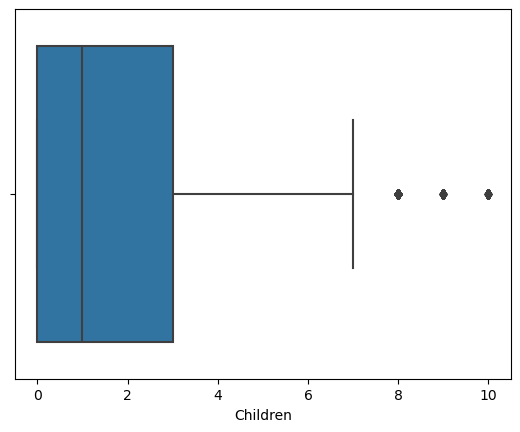

In [231]:
sns.boxplot(df_209, x='Children')

In [232]:
df_209.Children.describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

<Axes: xlabel='Age'>

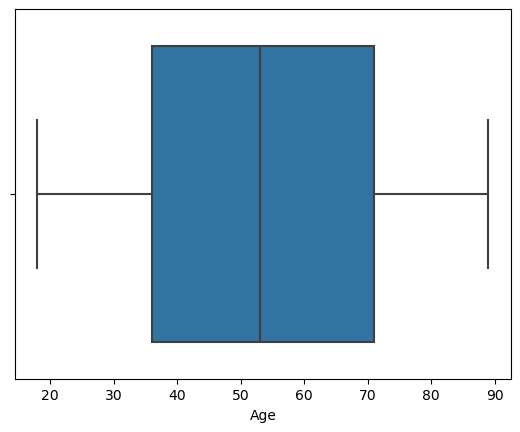

In [233]:
sns.boxplot(df_209, x='Age')

<Axes: xlabel='Income'>

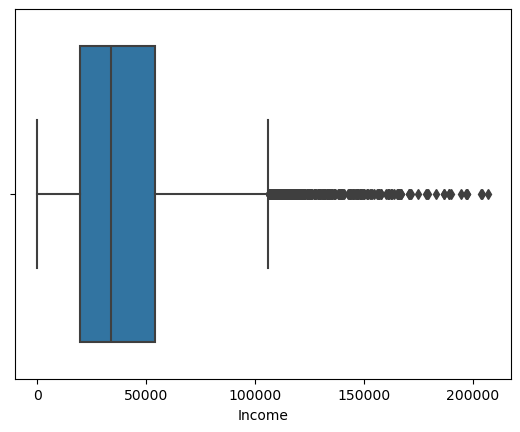

In [234]:
sns.boxplot(df_209, x='Income')

In [235]:
df_209.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

<Axes: xlabel='VitD_levels'>

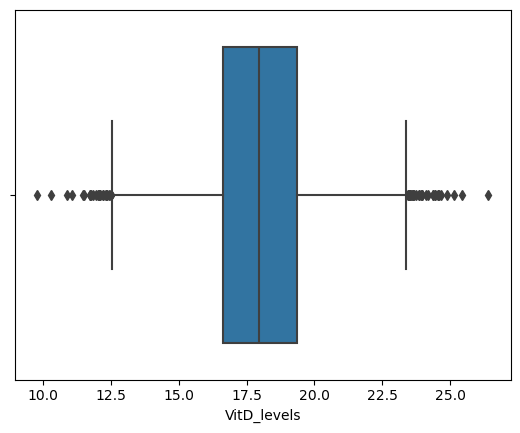

In [236]:
sns.boxplot(df_209, x='VitD_levels')

In [237]:
df_209.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

<Axes: xlabel='Doc_visits'>

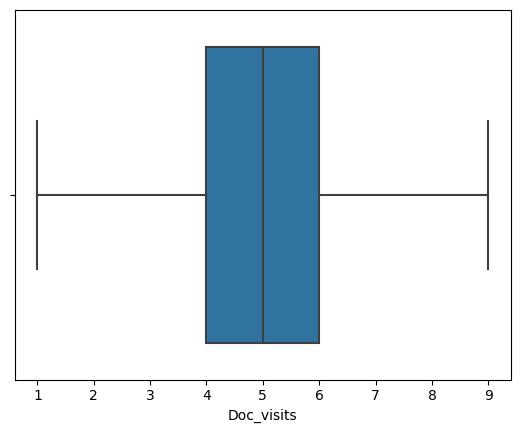

In [238]:
sns.boxplot(df_209, x='Doc_visits')

<Axes: xlabel='Full_meals_eaten'>

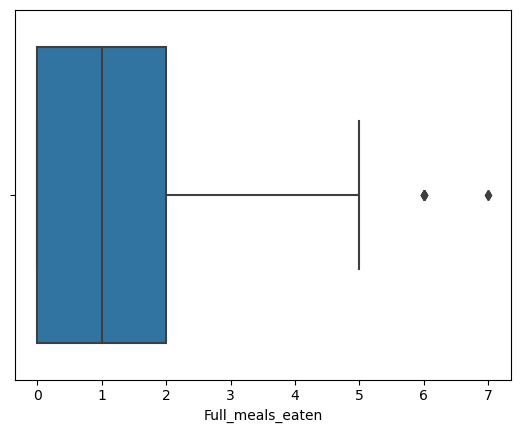

In [239]:
sns.boxplot(df_209, x='Full_meals_eaten')

In [240]:
df_209.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

<Axes: xlabel='vitD_supp'>

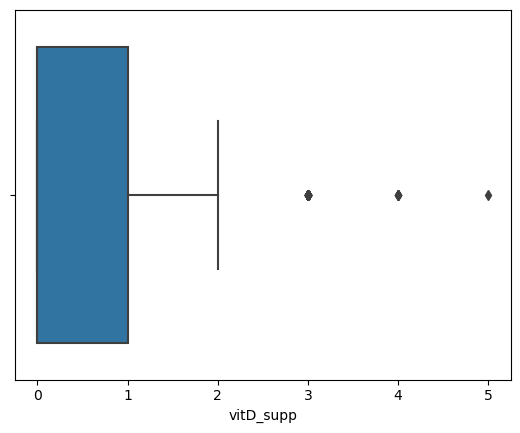

In [241]:
sns.boxplot(df_209, x='vitD_supp')

In [242]:
df_209.vitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

<Axes: xlabel='Initial_days'>

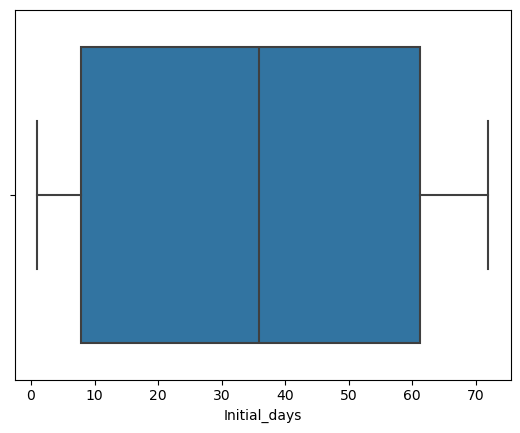

In [243]:
sns.boxplot(df_209, x='Initial_days')

<Axes: xlabel='TotalCharge'>

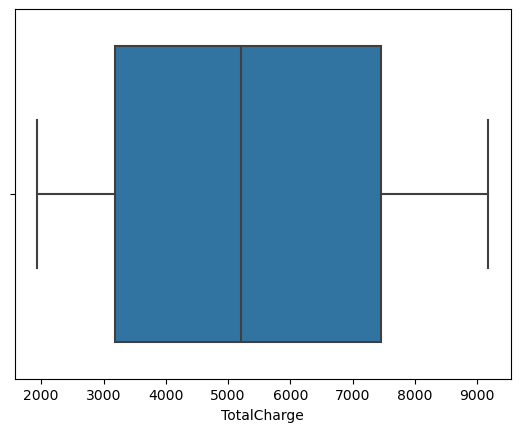

In [244]:
sns.boxplot(df_209, x='TotalCharge')

<Axes: xlabel='Additional_charges'>

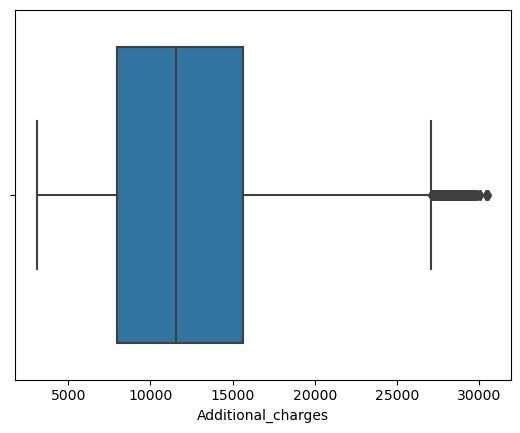

In [245]:
sns.boxplot(df_209, x='Additional_charges')

In [246]:
df_209.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

Once again, I am opting to retain outliers as they appear to be reasonable and justified and will maintain the diversity and integrity of the dataset

I will now re-express my Yes/No variables to 1/0

In [247]:
#re-expressing ReAdmis
df_209['ReAdmis_numeric']=df_209['ReAdmis']

In [248]:
#set up dictionary
dict_readmis={'ReAdmis_numeric' : {'No':0, 'Yes':1}}

In [249]:
#replace variable's values
df_209.replace(dict_readmis, inplace=True)

In [250]:
#re-expressing Soft_drink
df_209['Soft_drink_numeric']=df_209['Soft_drink']

In [251]:
#set up dictionary
dict_soft={'Soft_drink_numeric' : {'No':0, 'Yes':1}}

In [252]:
#replace variable's values
df_209.replace(dict_soft, inplace=True)

In [253]:
#re-expressing HighBlood
df_209['HighBlood_numeric']=df_209['HighBlood']

In [254]:
#set up dictionary
dict_blood={'HighBlood_numeric' : {'No':0, 'Yes':1}}

In [255]:
#replace variable's values
df_209.replace(dict_blood, inplace=True)

In [256]:
#re-expressing Stroke
df_209['Stroke_numeric']=df_209['Stroke']

In [257]:
#set up dictionary
dict_stroke={'Stroke_numeric' : {'No':0, 'Yes':1}}

In [258]:
#replace variable's values
df_209.replace(dict_stroke, inplace=True)

In [259]:
#re-expressing Overweight
df_209['Overweight_numeric']=df_209['Overweight']

In [260]:
#set up dictionary
dict_weight={'Overweight_numeric' : {'No':0, 'Yes':1}}

In [261]:
#replace variable's values
df_209.replace(dict_weight, inplace=True)

In [262]:
#re-expressing Arthritis
df_209['Arthritis_numeric']=df_209['Arthritis']

In [263]:
#set up dictionary
dict_arthritis={'Arthritis_numeric' : {'No':0, 'Yes':1}}

In [264]:
#replace variable's values
df_209.replace(dict_arthritis, inplace=True)

In [265]:
#re-expressing Diabetes
df_209['Diabetes_numeric']=df_209['Diabetes']

In [266]:
#set up dictionary
dict_diab={'Diabetes_numeric' : {'No':0, 'Yes':1}}

In [267]:
#replace variable's values
df_209.replace(dict_diab, inplace=True)

In [268]:
#re-expressing Hyperlipidemia
df_209['Hyperlipidemia_numeric']=df_209['Hyperlipidemia']

In [269]:
#set up dictionary
dict_lip={'Hyperlipidemia_numeric' : {'No':0, 'Yes':1}}

In [270]:
#replace variable's values
df_209.replace(dict_lip, inplace=True)

In [271]:
#re-expressing BackPain
df_209['BackPain_numeric']=df_209['BackPain']

In [272]:
#set up dictionary
dict_back={'BackPain_numeric' : {'No':0, 'Yes':1}}

In [273]:
#replace variable's values
df_209.replace(dict_back, inplace=True)

In [274]:
#re-expressing Anxiety
df_209['Anxiety_numeric']=df_209['Anxiety']

In [275]:
#set up dictionary
dict_anx={'Anxiety_numeric' : {'No':0, 'Yes':1}}

In [276]:
#replace variable's values
df_209.replace(dict_anx, inplace=True)

In [277]:
#re-expressing Allergic_rhinitis
df_209['Allergic_rhinitis_numeric']=df_209['Allergic_rhinitis']

In [278]:
#set up dictionary
dict_alle={'Allergic_rhinitis_numeric' : {'No':0, 'Yes':1}}

In [279]:
#replace variable's values
df_209.replace(dict_alle, inplace=True)

In [280]:
#re-expressing Reflux_esophagitis
df_209['Reflux_esophagitis_numeric']=df_209['Reflux_esophagitis']

In [281]:
#set up dictionary
dict_refl={'Reflux_esophagitis_numeric' : {'No':0, 'Yes':1}}

In [282]:
#replace variable's values
df_209.replace(dict_refl, inplace=True)

In [283]:
#re-expressing Asthma
df_209['Asthma_numeric']=df_209['Asthma']

In [284]:
#set up dictionary
dict_asth={'Asthma_numeric' : {'No':0, 'Yes':1}}

In [285]:
#replace variable's values
df_209.replace(dict_asth, inplace=True)

In [286]:
#drop original columns
df_209.drop(['Asthma', 'Reflux_esophagitis', 'Allergic_rhinitis', 'ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'BackPain', 'Anxiety', 'Hyperlipidemia'], axis=1, inplace=True)

In [287]:
df_209.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Area                        10000 non-null  object 
 1   Children                    10000 non-null  int64  
 2   Age                         10000 non-null  int64  
 3   Income                      10000 non-null  float64
 4   Marital                     10000 non-null  object 
 5   Gender                      10000 non-null  object 
 6   VitD_levels                 10000 non-null  float64
 7   Doc_visits                  10000 non-null  int64  
 8   Full_meals_eaten            10000 non-null  int64  
 9   vitD_supp                   10000 non-null  int64  
 10  Initial_admin               10000 non-null  object 
 11  Complication_risk           10000 non-null  object 
 12  Services                    10000 non-null  object 
 13  Initial_days                1000

In [288]:
#re-express variables with more than 2 response types
onehot_encoder = OneHotEncoder(sparse=False)

In [289]:
onehot_encoded=onehot_encoder.fit_transform(df_209[['Gender', 'Marital', 'Complication_risk', 'Initial_admin', 'Area', 'Services']])

C:\Users\Kmoik WGU\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [290]:
df_209encoded=pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['Gender', 'Marital', 'Complication_risk', 'Initial_admin', 'Area', 'Services']))

In [291]:
df_209encoded=df_209encoded.astype('int64')

In [292]:
#merging encoded columns to df
df_209=pd.concat([df_209, df_209encoded], axis=1)

In [293]:
#drop original columns
df_209.drop(['Gender', 'Marital', 'Complication_risk', 'Initial_admin', 'Area', 'Services'], axis=1, inplace=True)

In [294]:
df_209.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Children                             10000 non-null  int64  
 1   Age                                  10000 non-null  int64  
 2   Income                               10000 non-null  float64
 3   VitD_levels                          10000 non-null  float64
 4   Doc_visits                           10000 non-null  int64  
 5   Full_meals_eaten                     10000 non-null  int64  
 6   vitD_supp                            10000 non-null  int64  
 7   Initial_days                         10000 non-null  float64
 8   TotalCharge                          10000 non-null  float64
 9   Additional_charges                   10000 non-null  float64
 10  ReAdmis_numeric                      10000 non-null  int64  
 11  Soft_drink_numeric           

Next I will find the best variables for the model using SelectKBest and p-values

In [295]:
# Assign values to X for all predictor features
X = df_209.drop('ReAdmis_numeric', axis=1)
# Assign values to y for the dependent variable
y = df_209['ReAdmis_numeric']

In [296]:
# Standardize the X variables (explanatory) to put all on the same scale for KNN to measure distance
df_209 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_209), columns=df_209.columns)
df_209

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,...,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Area_Rural,Area_Suburban,Area_Urban,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,0.1,0.492958,0.417305,0.562756,0.625,0.000000,0.0,0.135022,0.246933,0.539851,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.3,0.464789,0.225268,0.550632,0.375,0.285714,0.2,0.199037,0.311343,0.527956,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.3,0.492958,0.068645,0.497410,0.375,0.142857,0.0,0.053117,0.068475,0.524027,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.845070,0.191156,0.408150,0.375,0.142857,0.0,0.010044,0.026168,0.359607,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.1,0.056338,0.005097,0.460128,0.500,0.000000,0.4,0.003562,0.024130,0.021531,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.2,0.098592,0.221220,0.432505,0.375,0.285714,0.2,0.712308,0.678314,0.211438,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,0.4,0.971831,0.071605,0.504615,0.500,0.000000,0.0,0.953321,0.801304,0.924967,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9997,0.3,0.380282,0.317553,0.441440,0.375,0.285714,0.0,0.974256,0.875146,0.442979,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.3,0.352113,0.142680,0.609113,0.500,0.285714,0.2,0.878492,0.787882,0.169676,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [297]:
#print features - confirm all other columns present
feature_names = X.columns
print(feature_names)

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Soft_drink_numeric', 'HighBlood_numeric',
       'Stroke_numeric', 'Overweight_numeric', 'Arthritis_numeric',
       'Diabetes_numeric', 'Hyperlipidemia_numeric', 'BackPain_numeric',
       'Anxiety_numeric', 'Allergic_rhinitis_numeric',
       'Reflux_esophagitis_numeric', 'Asthma_numeric', 'Gender_Female',
       'Gender_Male', 'Gender_Nonbinary', 'Marital_Divorced',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Complication_risk_High', 'Complication_risk_Low',
       'Complication_risk_Medium', 'Initial_admin_Elective Admission',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Area_Rural', 'Area_Suburban',
       'Area_Urban', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI'],
      dty

In [298]:
#k=features 
k_best = SelectKBest(score_func = f_classif, k='all')

In [299]:
X_new = k_best.fit_transform(X, y)

In [300]:
selected_features_indices=k_best.get_support(indices=True)

In [301]:
selected_features_names=X.columns[selected_features_indices]

In [302]:
#find p values 
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':k_best.pvalues_}).sort_values('p_value')
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]

In [303]:
print(p_values)

                                Feature   p_value
8                           TotalCharge  0.000000
7                          Initial_days  0.000000
40                     Services_CT Scan  0.014707
0                              Children  0.018613
25                     Marital_Divorced  0.030143
41                 Services_Intravenous  0.042233
34    Initial_admin_Emergency Admission  0.048766
21                       Asthma_numeric  0.086677
1                                   Age  0.113891
9                    Additional_charges  0.173237
17                     BackPain_numeric  0.183133
5                      Full_meals_eaten  0.223574
35  Initial_admin_Observation Admission  0.231263
22                        Gender_Female  0.243554
2                                Income  0.250029
6                             vitD_supp  0.269697
33     Initial_admin_Elective Admission  0.276650
23                          Gender_Male  0.326515
42                         Services_MRI  0.351962


In [304]:
#obtained 7 most significant variables with p values less than 0.05: TotalCharge, Initial_days, Sevices_CT Scan, Children, Marital_divorced, Services_Intravenous, and Initial_Admin_Emergency Admission

In [305]:
#check for multicollinearity using VIF
#set independent variable for VIF
X=df_209[['TotalCharge', 'Initial_days', 'Children', 'Marital_Divorced', 'Initial_admin_Emergency Admission', 'Services_CT Scan', 'Services_Intravenous']]

In [306]:
#VIF dataframe
vif_df_209=pd.DataFrame()
vif_df_209["feature"]=X.columns

In [307]:
#calculate VIF for all independent variables
vif_df_209["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [308]:
print(vif_df_209)

                             feature         VIF
0                        TotalCharge  215.896697
1                       Initial_days  177.701826
2                           Children    1.751354
3                   Marital_Divorced    1.204073
4  Initial_admin_Emergency Admission    4.510178
5                   Services_CT Scan    1.179536
6               Services_Intravenous    1.433406


In [309]:
#removing totalcharge due to high multicollinearity
#set independent variable for VIF
X=df_209[['Initial_days', 'Children', 'Marital_Divorced', 'Initial_admin_Emergency Admission', 'Services_CT Scan', 'Services_Intravenous']]

In [310]:
#VIF dataframe
vif_df_209=pd.DataFrame()
vif_df_209["feature"]=X.columns

In [311]:
#calculate VIF for all independent variables
vif_df_209["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [312]:
print(vif_df_209)

                             feature       VIF
0                       Initial_days  1.847057
1                           Children  1.650881
2                   Marital_Divorced  1.186747
3  Initial_admin_Emergency Admission  1.647724
4                   Services_CT Scan  1.153524
5               Services_Intravenous  1.374259


In [313]:
#all multicolinearity has been resolved - all are under 10

In [314]:
#renaming statistically significant columns without spaces
df_209.rename(columns={'Initial_admin_Emergency Admission' : 'Initial_admin_Emergency', 'Services_CT Scan' : 'Services_CTscan'}, inplace=True)

View columns to be used in KNN model

In [315]:
df_209.Initial_days.describe()

count    10000.000000
mean         0.471310
std          0.370661
min          0.000000
25%          0.097130
50%          0.490765
75%          0.847555
max          1.000000
Name: Initial_days, dtype: float64

In [316]:
df_209.Children.describe()

count    10000.000000
mean         0.209720
std          0.216366
min          0.000000
25%          0.000000
50%          0.100000
75%          0.300000
max          1.000000
Name: Children, dtype: float64

In [317]:
df_209.Marital_Divorced.describe()

count    10000.000000
mean         0.196100
std          0.397065
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Marital_Divorced, dtype: float64

In [318]:
df_209.Initial_admin_Emergency.describe()

count    10000.000000
mean         0.506000
std          0.499989
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Initial_admin_Emergency, dtype: float64

In [319]:
df_209.Services_CTscan.describe()

count    10000.000000
mean         0.122500
std          0.327879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Services_CTscan, dtype: float64

In [320]:
df_209.Services_Intravenous.describe()

count    10000.000000
mean         0.313000
std          0.463738
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Services_Intravenous, dtype: float64

In [321]:
#save cleaned data set
clean_df_209=df_209.copy(deep=True)

In [322]:
clean_df_209.to_csv('C:/Users/Kmoik WGU/Desktop/KMoikD209_medical.csv')

In [323]:
#KNN model

In [324]:
#Split the data set with an 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 25)

In [325]:
#Save the training and testing sets as csv files
pd.DataFrame(X_train).to_csv('C:/Users/Kmoik WGU/Desktop/X_train.csv')
pd.DataFrame(X_test).to_csv('C:/Users/Kmoik WGU/Desktop/X_test.csv')
pd.DataFrame(y_train).to_csv('C:/Users/Kmoik WGU/Desktop/y_train.csv')
pd.DataFrame(y_test).to_csv('C:/Users/Kmoik WGU/Desktop/y_test.csv')

In [326]:
#hyperparameter tuning
param_grid={'n_neighbors': np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [327]:
# Find best parameter from GridSearch
knn_cv.best_params_

{'n_neighbors': 7}

In [328]:
# Find score of best parameter from GridSearchCV
knn_cv.best_score_

0.9728571428571428

In [329]:
# Perform KNN using the value of k=7 from the above grid search and create classification report
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
y_pred_prob=knn.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1900
           1       0.95      0.98      0.97      1100

    accuracy                           0.97      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [330]:
#Accuracy Score, Confusion Matrix, AUC
# Fit to the training data
knn.fit(X_train, y_train)
print("The Accuracy Score of the KNN model:")
print(knn.score(X_test, y_test))
y_predicted=knn.predict(X_test)
print("The Confusion Matrix for the KNN Model:")
print(confusion_matrix(y_test, y_predicted))
y_predicted_probability = knn.predict_proba(X_test)[:,1]
print("The Area Under the Curve (AUC) for the KNN Model:")
print(roc_auc_score(y_test, y_predicted_probability))

The Accuracy Score of the KNN model:
0.9743333333333334
The Confusion Matrix for the KNN Model:
[[1840   60]
 [  17 1083]]
The Area Under the Curve (AUC) for the KNN Model:
0.9959787081339713


In [331]:
#Model Complexity Curve
neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))        

In [332]:
# Loop over different values of k
for i, k in enumerate (neighbors):
    knn = KNeighborsClassifier (n_neighbors=k)
    knn.fit (X_train,y_train)
    train_accuracy[i] = knn.score (X_train, y_train)
    test_accuracy[i] = knn.score (X_test, y_test)
print("K: ", i, "Train Score:", train_accuracy[i], "Test Score:", test_accuracy[i])

K:  23 Train Score: 0.9715714285714285 Test Score: 0.966


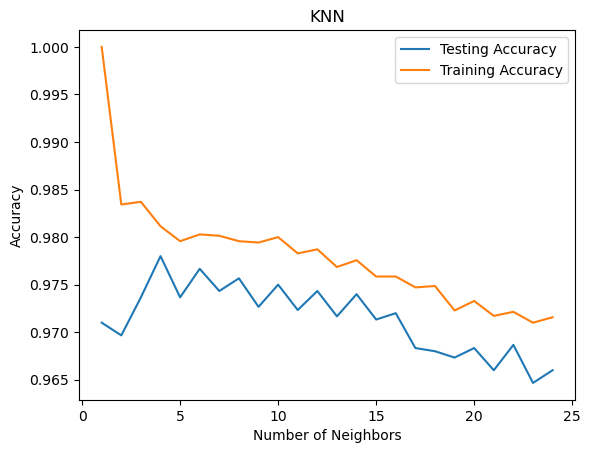

In [333]:
#Generate plot
plt.title('KNN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()